In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.
# If there are 1,500 latitudes and longitudes, there will be 1,500 tuples of paired latitudes and longitudes,
# where each latitude and longitude in a tuple can be accessed by the index of 0 and 1, respectively.

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)



In [4]:
# You can only unzip a zipped tuple once before it is removed from the computer's memory.
# Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
# Now that we have our ordered pairs of latitudes and longitudes in a list, we can iterate through
# the list of tuples and find the nearest city to those coordinates.

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Some of this code should look familiar, but let's break it down:

# We create a cities list to store city names.
# We iterate through the coordinates, as in our practice, and retrieve the nearest city
# using the latitude and longitude pair.
# We add a decision statement with the logical operator not in to determine whether
# the found city is already in the cities list. If not, then we'll use the
# append() function to add it. We are doing this because among the 1,500 latitudes
# and longitudes, there might be duplicates, which will retrieve duplicate cities,
# and we want to be sure we capture only the unique cities.

In [8]:
# 6.2.3
# Make an API Call

#In our API_practice file, add a new cell after the code we wrote to get the unique cities from with the
# citipy module. In the new cell, we will import the Requests Library and your API key from the config.py file.

# Import the requests library.

import requests
requests.__version__


# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=b00c1cb04545967b459e30d8ace9ab10


In [10]:
# 6.2.6
# Let's use pseudocode to map out, at a high level, how we will get the weather data for each city for the website.
# We will need to do the following:
# Import our dependencies and initialize counters and an empty list that will hold the weather data.
# Loop through the cities list.
# Group the cities in sets of 50 to log the process as we find the weather data for each city.
# Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# Build the city_url or endpoint for each city.
# Log the URL and the record and set numbers.
# Make an API request for each city.
# Parse the JSON weather data for the following:
# City, country, and date
# Latitude and longitude
# Maximum temperature
# Humidity
# Cloudiness
# Wind speed
# Add the data to a list in a dictionary format and then convert the list to a DataFrame.

# Import Dependencies, and Initialize an Empty List and Counters

# At the top of our code block, we are going to declare an empty list, city_data = []; add a print statement
# that references the beginning of the logging; and create counters for the record numbers, 1–50;
# and the set counter.

# We will now work in our WeatherPy.ipynb file. Before continuing, make sure the following tasks are completed:

# Import your Requests Library and the weather_api_key.
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL.
# Also, import the datetime module using the following code:

# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# In the code block, we have initialized the counters at 1 because we want the first iteration of the
# logging for each recorded response and the set to start at 1.
# Loop Through the List of Cities and Build the City URL
# Next, we need to iterate through our list of cities and begin building the URL for each city,
# while grouping our records in sets of 50. To do this, use for i in range(len(cities)) and
# the index to tell us when we get to 50. We can also retrieve the city from the cities list
# and add it to the city_url by using indexing, as shown in the following code:

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
 #       set_count += 1
  #      record_count = 1
    # Create endpoint URL with each city.
   # city_url = url + "&q=" + cities[i]
    

# Every time we want to reference the city in our code, we need to use the indexing on the cities list.
# Unfortunately, this will cause programming errors when we are building the city_url because
# it adds the index, not the city name, to the city_url. To fix this issue, we need to create
# another for loop to get the city from the cities list.
# Instead of using two for loops, we can use the enumerate() method as an alternative way
# to iterate through the list of cities and retrieve both the index, and the city from the list.
# The syntax for the enumerate() method is the following: for i, item in enumerate(list):
# Let's use the enumerate() method to get the index of the city for logging purposes and
# the city for creating an endpoint URL. Add the following code below our counters.

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
#Let's break down the code so we understand fully before continuing:
# We create the for loop with the enumerate() method and reference the index and the city in the list.
# In the conditional statement, we check if the remainder of the index divided by 50 is equal to 0
# and if the index is greater than or equal to 50. If the statement is true, then the set_count
# and the record_count are incremented by 1.
# Inside the conditional statement, we create the URL endpoint for each city, as before. However, we are
# removing the blank spaces in the city name and concatenating the city name with, city.replace(" ","+"). This will
# find the corresponding weather data for the city instead of finding the weather data for the first part of
# the city name.
# Compare the URLs for Cabo (Links to an external site.) and Cabo San Lucas (Links to an external site.).
# Also, we add a print statement that tells us the record count and set count, and the city that is being processed.
# Then we add one to the record count before the next city is processed.
# Next, we will retrieve the data from the JSON weather response for each city.

# Note: When retrieving data from an API, or even when scraping a webpage, make sure there is data to parse.
# If not, the script might stop at that moment and not finish getting all the data we need.

# Handle API Request Errors with try-except Blocks
# We have handled request errors for getting the response from a valid city with an API call
# using conditional statements. Now we'll learn how to handle errors while parsing weather data from a JSON file.
# We'll add a try-except block to our code to prevent the API request from stopping prematurely if the
# city_weather request isn't a valid response. If the request isn't valid, the code will not find the
# first item requested, which is the dictionary "coord" with the code city_lat = city_weather["coord"]["lat"],
# and skip the city and continue to run.
# The try-except block has similar syntax and structure as the if-else statement. The basic format is as follows:
# try:
#   Do something
# except:
#   print("An exception occurred")


#We can add a try-except block to our code and, below the tryblock, we will parse the data from the JSON file and add the data to the cities list.
# Let's add a try block. Then, below the try block, do the following:
# Parse the JSON file.
# Assign variables for each piece of data we need.
# Add the data to the cities list in a dictionary format.
#Add the following code after record_count += 1.

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



#Let's review the code:

#We parse the JSON file for the current city.
#If there is no weather data for the city, i.e. , a <Response [404]> then there is no weather to retrieve and City not found. Skipping... is printed.
#If there is weather data for the city, we will retrieve the latitude, longitude, maximum temperature, humidity, cloudiness, wind speed, and date and assign those values to variables.
#We could write a try-except block for each one of these parameters to handle the KeyError if the data wasn't found, but since these parameters are always present in the response this won't be necessary.
#We append the cities list with a dictionary for that city, where the key-value pairs are the values from our weather parameters.
#Finally, below the try block and after the except block, we add the closing print statement, which will let us know the data retrieval has been completed. Make sure that your except block is indented and in line with the try block, and that the print statements are flush with the margin.
# Under the print statement in the except block, we add the pass statement, which is a general purpose statement to handle all errors encountered and to allow the program to continue.
# IMPORTANT
# Generally, it isn't good coding practice to add the pass statement to the except block. Ideally, we want to handle or catch each error as it happens and do something specific (e.g., add another try block or print out the error).
# Now you have all your code to perform the API calls for each city and parse the JSON data. Let's run the cell!

# As your code is running, your output should be similar to the following image:
#

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | seinajoki
Processing Record 2 of Set 1 | hermanus
Processing Record 3 of Set 1 | souillac
Processing Record 4 of Set 1 | acarau
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | mahebourg
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | santa vitoria do palmar
Processing Record 12 of Set 1 | saint anthony
Processing Record 13 of Set 1 | sydney
Processing Record 14 of Set 1 | cherskiy
Processing Record 15 of Set 1 | punta arenas
Processing Record 16 of Set 1 | boa vista
Processing Record 17 of Set 1 | mar del plata
Processing Record 18 of Set 1 | silopi
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | kladovo
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | kangaatsiaq
Processing Record 23 of Set

Processing Record 42 of Set 4 | bengkulu
Processing Record 43 of Set 4 | nanhai
Processing Record 44 of Set 4 | saskylakh
Processing Record 45 of Set 4 | lasa
Processing Record 46 of Set 4 | samarai
Processing Record 47 of Set 4 | rawson
Processing Record 48 of Set 4 | pangkalanbuun
Processing Record 49 of Set 4 | upington
Processing Record 50 of Set 4 | porbandar
Processing Record 1 of Set 5 | mtwango
Processing Record 2 of Set 5 | constancia
Processing Record 3 of Set 5 | alihe
Processing Record 4 of Set 5 | changli
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | sorong
Processing Record 7 of Set 5 | landskrona
Processing Record 8 of Set 5 | omsukchan
Processing Record 9 of Set 5 | fort nelson
Processing Record 10 of Set 5 | mitu
Processing Record 11 of Set 5 | adre
Processing Record 12 of Set 5 | sinnamary
Processing Record 13 of Set 5 | ostrovnoy
Processing Record 14 of Set 5 | acapulco
Processing Record 15 of Set 5 | manta
Processing Record 16 of Set 5 | zhu

Processing Record 30 of Set 8 | mehamn
Processing Record 31 of Set 8 | hvammstangi
City not found. Skipping...
Processing Record 32 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 33 of Set 8 | nieuw amsterdam
Processing Record 34 of Set 8 | kerki
City not found. Skipping...
Processing Record 35 of Set 8 | kawalu
Processing Record 36 of Set 8 | umba
Processing Record 37 of Set 8 | launceston
Processing Record 38 of Set 8 | jequie
Processing Record 39 of Set 8 | opuwo
Processing Record 40 of Set 8 | olavarria
Processing Record 41 of Set 8 | victoria
Processing Record 42 of Set 8 | nioro
Processing Record 43 of Set 8 | ghanzi
Processing Record 44 of Set 8 | maryborough
Processing Record 45 of Set 8 | yar-sale
Processing Record 46 of Set 8 | port lincoln
Processing Record 47 of Set 8 | palu
Processing Record 48 of Set 8 | kaitangata
Processing Record 49 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 8 | saint-francois
Processing Record 1 

Processing Record 12 of Set 12 | umm lajj
Processing Record 13 of Set 12 | makung
City not found. Skipping...
Processing Record 14 of Set 12 | cairns
Processing Record 15 of Set 12 | obihiro
Processing Record 16 of Set 12 | ajaccio
Processing Record 17 of Set 12 | bolungarvik
City not found. Skipping...
Processing Record 18 of Set 12 | curuguaty
Processing Record 19 of Set 12 | vardo
Processing Record 20 of Set 12 | ambon
Processing Record 21 of Set 12 | grajau
Processing Record 22 of Set 12 | bud
Processing Record 23 of Set 12 | aguimes
Processing Record 24 of Set 12 | nemuro
Processing Record 25 of Set 12 | tessalit
Processing Record 26 of Set 12 | ixtapa
Processing Record 27 of Set 12 | dongsheng
Processing Record 28 of Set 12 | lipin bor
Processing Record 29 of Set 12 | am timan
Processing Record 30 of Set 12 | sesvete
Processing Record 31 of Set 12 | maxixe
Processing Record 32 of Set 12 | diffa
Processing Record 33 of Set 12 | porto santo
Processing Record 34 of Set 12 | fevralsk

In [12]:
# After collecting all our data, we can tally the number of cities in the city_data array of dictionaries
# using the len() function.

# IMPORTANT
# If you didn't get more than 500 cities, run the code to generate random latitude and longitude
# combinations and all the code below it. Or increase the size of the latitude and longitude combinations.



In [27]:
# 6.2.7
# Create a DataFrame of City Weather Data

# You have the data in a list of dictionaries, which is a format that you can use to create a Pandas DataFrame. You will also need to export the DataFrame as a CSV file for Jack.
# Our next steps will entail converting the array of dictionaries to a DataFrame, ensuring the columns are in the correct order, and exporting the DataFrame to a comma-separated (CSV) file.

# REWIND
#Recall that we can convert a list of dictionaries to a Pandas DataFrame using df = pd.DataFrame(list with dictionaries).
# n a new cell, add the following code to convert the array of dictionaries to a Pandas DataFrame and run the cell.

# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Seinajoki,62.7945,22.8282,58.23,80,1,0.00,FI,2021-07-13 00:31:21
1,Hermanus,-34.4187,19.2345,46.80,66,100,26.06,ZA,2021-07-13 00:27:03
2,Souillac,-20.5167,57.5167,70.18,68,40,11.50,MU,2021-07-13 00:31:22
3,Acarau,-2.8856,-40.1200,80.22,78,36,19.91,BR,2021-07-13 00:31:22
4,Dikson,73.5069,80.5464,33.40,86,100,18.21,RU,2021-07-13 00:31:22
5,Vaini,-21.2000,-175.2000,75.69,89,100,13.22,TO,2021-07-13 00:31:23
6,Mahebourg,-20.4081,57.7000,70.09,68,40,11.50,MU,2021-07-13 00:31:23
7,Atuona,-9.8000,-139.0333,77.40,77,18,22.86,PF,2021-07-13 00:26:48
8,Castro,-24.7911,-50.0119,52.99,73,0,2.55,BR,2021-07-13 00:31:24
9,Rikitea,-23.1203,-134.9692,73.69,75,5,13.53,PF,2021-07-13 00:31:24


In [28]:
# Next, we'll reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed, so they are easy to read.

# REWIND
#Recall that to reorder the columns, we assign a variable to an array of the columns in the order we want them to appear:

#new_column_order = ["column2", "column4", "column1"]

#Then, we assign a new or the same DataFrame with new column order:

#df = df[new_column_order]

In [29]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Seinajoki,FI,2021-07-13 00:31:21,62.7945,22.8282,58.23,80,1,0.00
1,Hermanus,ZA,2021-07-13 00:27:03,-34.4187,19.2345,46.80,66,100,26.06
2,Souillac,MU,2021-07-13 00:31:22,-20.5167,57.5167,70.18,68,40,11.50
3,Acarau,BR,2021-07-13 00:31:22,-2.8856,-40.1200,80.22,78,36,19.91
4,Dikson,RU,2021-07-13 00:31:22,73.5069,80.5464,33.40,86,100,18.21
5,Vaini,TO,2021-07-13 00:31:23,-21.2000,-175.2000,75.69,89,100,13.22
6,Mahebourg,MU,2021-07-13 00:31:23,-20.4081,57.7000,70.09,68,40,11.50
7,Atuona,PF,2021-07-13 00:26:48,-9.8000,-139.0333,77.40,77,18,22.86
8,Castro,BR,2021-07-13 00:31:24,-24.7911,-50.0119,52.99,73,0,2.55
9,Rikitea,PF,2021-07-13 00:31:24,-23.1203,-134.9692,73.69,75,5,13.53


In [30]:
#Lastly, following the instructions below, we'll create an output file to save the DataFrame as a CSV
# in a new folder for that file.
#In our World_Weather_Analysis folder, create a new folder called "weather_data."
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [31]:
#The last line in the code block will export the DataFrame to a CSV file, with the index label (or column A) header as "City_ID." If we ever need to export the CSV file to a DataFrame, that header will be present in the DataFrame.

#We've completed our tasks for making API calls, parsing the response, and collecting the data for our project. Before we move on to graphing and statistical analysis, let's update our GitHub repository.

In [32]:
# 6.3.1 Plot Latitude vs. Temperature
# We are going to create a series of scatter plots for each weather parameter against the latitude for
# all the cities. The students will use these scatter plots to write a summary report on how different
# weather parameters change based on the latitude.

#We'll create scatter plots for latitude vs. maximum temperature, humidity, cloudiness, and wind speed.
# The first, latitude vs. maximum temperature, should look like the following scatter plot.

# Get Data for Plotting

#First, we'll retrieve the data we need to create our scatter plots. We will need latitude, maximum
# temperature, humidity, cloudiness, and wind speed from all the cities. Add the following code to a
# new cell and run the cell.

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [33]:
#our final scatter plot will need the current date in the title. To add the current date, we will need to import the time module, rather than the datetime module that we used to convert the date. The time module is a standard Python library, so there is no need to install it.



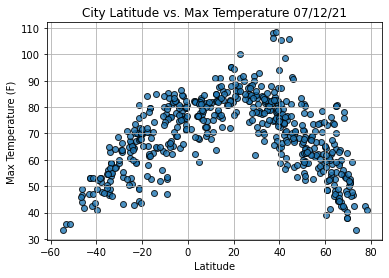

In [34]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

In [35]:
#The balance of the scatter plots will share the same format. All we need to do is change the y-axis variable for each weather parameter. Let's create the scatter plots quickly by copying the code and changing the y-axis variable.


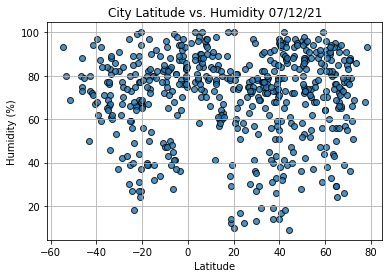

In [36]:
# 6.3.2 Plot Latitude vs. Humidity

# Great job on the first scatter plot! Now, you need to create a scatter plot that compares the latitude vs. the humidity.
#We can repurpose our code for the maximum temperature scatter plot and create a scatter plot for the latitude versus humidity.

# In addition to changing the y-axis variable to "humidity," we need to change the title to "Humidity," and the y-axis label to "Humidity (%)."


# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

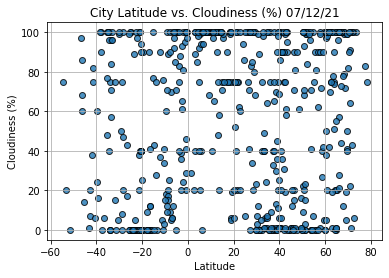

In [37]:
#6.3.3
#Plot Latitude vs. Cloudiness
#You have a few more plots to create, and you know that it's time to stay hyperfocused. Whenever you start reusing code, it gets a bit easier to make a mistake. These charts will be on a public website for all to see, so the stakes are high.
#Let's refactor the code for our scatter plots by changing the y-axis variable to "cloudiness," the title to "Cloudiness (%)," and the y-axis label to "Cloudiness (%)."

# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

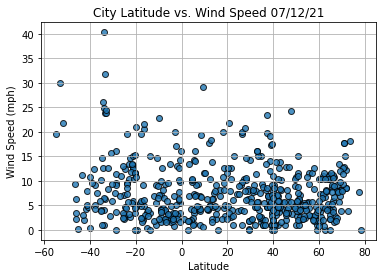

In [38]:
#6.3.4 Plot Latitude vs. Wind Speed

#You have one last scatter plot to make. If you can make it through this one, you'll be done with scatter plots for the day. Just be sure to upload them to GitHub so the team working on the STEM project can get them for the community outreach website!
#Now, we can create our last scatter plot! Let's repurpose the code we have been using and change the y-axis variable to "wind speed," the title to "Wind Speed," and the y-axis label to "Wind Speed (mph)."
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()



In [39]:
# 6.4.1 Use Linear Regression to Find the Relationship Between Variables
#Jack loves your work on the scatter plots thus far, and the other tech companies were impressed, too. They ask you to put together something that can help the students explore how to determine correlations between weather data and latitude.
#You and Jack decide to divide and conquer this task. He will write the piece on the scientific method and describe how to use linear regression on the scatter plots. You volunteer to use your scatter plot skills to create scatter plots for each weather parameter on the Northern and Southern Hemispheres. You'll need to also add a regression line equation and correlation coefficient to each scatter plot, so your first step is to brush up on linear regression. You know this is something Jack uses regularly, so you'll need to really understand it if you want to continue impressing the team.

#Linear regression is used to find a relationship between a dependent variable and one or more independent variables. The trick is to find something (a dependent variable) that depends on something else (the independent variable) and plot that relationship.

#For example, let's say we wanted to understand how weather affects ice cream sales. We would model the linear regression between temperature (the independent variable) and ice cream sales (the dependent variable). Our hypothesis about the relationship would be that as temperatures rise, as they do in summer, more ice cream is sold. We will learn more hypothesis testing and building models in later modules.

#For your project, you've already been working with independent and dependent variables. We have enough data to test relationships by creating scatter plots as we've done for each weather parameter vs. latitude. Plotting the data is the first step in determining if there might be an association between the two variables. For our scatter plots, the independent variable is the latitude, plotted on the x-axis, as its value is fixed. When we change the latitude, temperature changes, making it the dependent variable.

#IMPORTANT
#Independent variable: the variable changed by the analyst to observe how it affects the dependent variable 

#Dependent variable: the variable tested by the analyst to observe how it is affected by the independent variable
#To determine if maximum temperature correlates to latitude, we can plot a linear regression line, a straight trendline predicting the average y-value, or dependent variable, for a given x-value, or independent variable. This line can be plotted using the equation y = mx + b, where "m" is the slope of the line and "b" is the y-intercept. For every x-value, or latitude we use in the equation, we will get a predicted temperature value.

#To determine how strong the relationship is between the fitted line and the data, we find the correlation coefficient, or r-value. A correlation coefficient close to 1 shows a strong positive correlation, whereas close to –1 shows a strong negative correlation. A correlation coefficient close to zero is no correlation.

#Let's practice using linear regression on fake weather data.



In [40]:
#6.4.2 Find the Correlation Between Latitude and Maximum Temperature

# Now that you are familiar with generating linear regression lines and equations, you can put this knowledge to work by generating a regression line for latitude and maximum temperature for the Northern and Southern Hemispheres.

#You send Jack a quick text to let him know you'll be back to APIs soon—and you're excited to fill him in on what you've learned about this side project.
#Using the data from the Northern and Southern Hemispheres, we are going to perform linear regression on all four weather parameters: maximum temperature, humidity, cloudiness, and wind speed.

#We have an algorithm that performs the linear regression; returns the equation of the regression line, and correlation coefficient, and p value; and adds the regression line to a scatter plot of city weather data. Below, the code looks like what we have used before.

#Create a Linear Regression Function

#In a new cell of our WeatherPy.ipynb Jupyter Notebook file, let's create a function, "plot_linear_regression", and add the four parameters inside the parentheses. Our function should look like the following.

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
#def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):




In [41]:
#In our function, we have four parameters: x_values, y_values, y_label, and text_coordinates, and we will add a fifth parameter for the title, called, title. Now, add the algorithm we use to perform the linear regression underneath the function. Our function should look like the following.
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                     Cherskiy
Country                        RU
Date          2021-07-13 00:31:25
Lat                         68.75
Lng                         161.3
Max Temp                    53.31
Humidity                       57
Cloudiness                     72
Wind Speed                  13.49
Name: 13, dtype: object

In [47]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
542     True
543    False
544     True
545     True
546     True
Name: Lat, Length: 547, dtype: bool

In [48]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Seinajoki,FI,2021-07-13 00:31:21,62.7945,22.8282,58.23,80,1,0.00
4,Dikson,RU,2021-07-13 00:31:22,73.5069,80.5464,33.40,86,100,18.21
11,Saint Anthony,US,2021-07-13 00:31:25,45.0205,-93.2180,81.18,47,1,1.01
13,Cherskiy,RU,2021-07-13 00:31:25,68.7500,161.3000,53.31,57,72,13.49
15,Boa Vista,BR,2021-07-13 00:31:26,2.8197,-60.6733,82.38,74,20,0.00
...,...,...,...,...,...,...,...,...,...
539,Soller,ES,2021-07-13 00:34:15,39.7662,2.7152,74.86,71,69,1.99
542,Taoudenni,ML,2021-07-13 00:34:16,22.6783,-3.9836,100.35,17,60,6.06
544,Bilma,NE,2021-07-13 00:34:17,18.6853,12.9164,88.14,29,100,8.08
545,Aleksandrovsk-Sakhalinskiy,RU,2021-07-13 00:34:17,50.8975,142.1561,67.82,86,93,10.96


In [50]:
# Create the Hemisphere DataFrames
# We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.
# To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame. The loc method accesses a group of rows and columns in the current DataFrame by an index, labels, or a Boolean array. The syntax to get a specific row from a current DataFrame is row = df.loc[row_index].
# Let's apply this method to our city_data_df DataFrame by adding the code index13 = city_data_df.loc[13] in a cell and running the cell. The output will present all the information at index 13 of the city_data_df DataFrame. Note that you may see a different city in your output cell than the one shown in the following image.

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Seinajoki,FI,2021-07-13 00:31:21,62.7945,22.8282,58.23,80,1,0.00
4,Dikson,RU,2021-07-13 00:31:22,73.5069,80.5464,33.40,86,100,18.21
11,Saint Anthony,US,2021-07-13 00:31:25,45.0205,-93.2180,81.18,47,1,1.01
13,Cherskiy,RU,2021-07-13 00:31:25,68.7500,161.3000,53.31,57,72,13.49
15,Boa Vista,BR,2021-07-13 00:31:26,2.8197,-60.6733,82.38,74,20,0.00


In [52]:
#Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.

#We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.

#To create DataFrames for the Northern and Southern Hemispheres' data, add the code to a new cell and run the code.

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
#Now we can perform linear regression on latitude and maximum temperature from each hemisphere DataFrame.

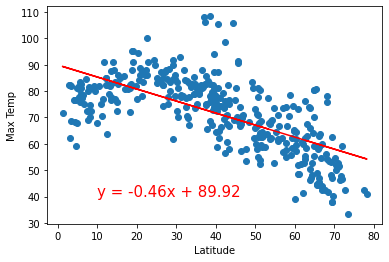

In [53]:
#Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

#To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the northern_hemi_df DataFrame.

#Call the plot_linear_regression function with the x and y values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

# If the equation for the regression line doesn't show up on your graph, you can change the text_coordinates until you see the equation.


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


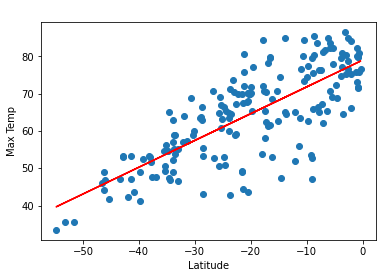

In [54]:
#To generate the linear regression on the maximum temperature for the Southern Hemisphere, reuse the code for the Northern Hemisphere and replace the northern_hemi_df DataFrame with the southern_hemi_df DataFrame to get the x- and y-values.

#Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the maximum temperature scatter plot. Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))



In [ ]:
#Finding  
#The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

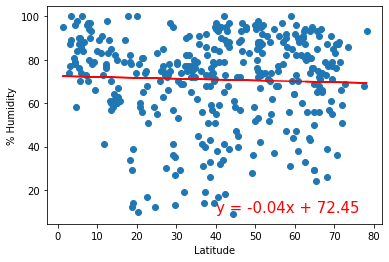

In [55]:
# 6.4.3 Find the Correlation Between Latitude and Percent Humidity
# You have a few more plots with regression lines to create. It's easier to make a mistake when you are copying and pasting code over and over, so stay focused! Now you'll create the linear equation and scatter plot of the latitude and percent humidity for the Northern and Southern Hemispheres.
#Using the plot_linear_regression function, we can generate the regression lines on the percent humidity for the Northern and Southern Hemispheres.
#Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

# To perform the linear regression on the percent humidity for the Northern Hemisphere, set the x-value equal to the latitude column and y-value equal to the Humidity column from the northern_hemi_df DataFrame.

#Call the plot_linear_regression function with the x- and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

#Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))




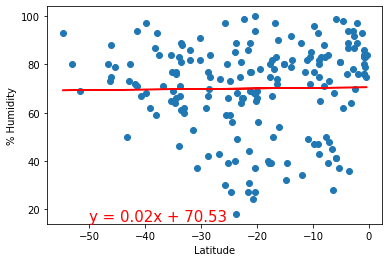

In [64]:
# Perform Linear Regression on the Percent Humidity for the Southern Hemisphere

# Next, we will perform linear regression on the percent humidity and latitudes for the Southern Hemisphere.

# For our linear regression line and plot of the percent humidity and latitudes for the Southern Hemisphere, set the x-value equal to the latitude column and y-value equal to the humidity column from the southern_hemi_df DataFrame.

# Call the plot_linear_regression function, with the x-and y-values, and edit the title, y_label, and text_coordinates for the percent humidity scatter plot.

# Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

In [ ]:
# finding
#The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. Check the r-values for your plots

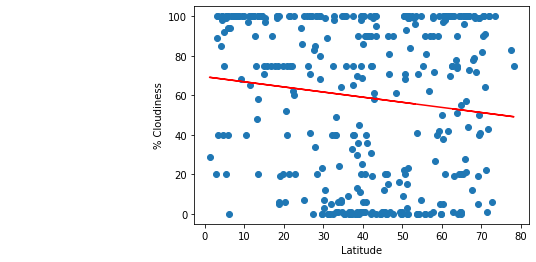

In [65]:
# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness
# You're almost done creating the linear regression line and plots. This time, create the linear equation plot on the latitude and percent humidity for the Northern and Southern Hemispheres. Stay focused so you don't make any mistakes when you refactor the code.
# Being able to write a function and call it with the appropriate data is a valuable skill. Let's knock out another regression line and plot. This time we'll get the data for the percent cloudiness for the Northern and Southern Hemispheres.
# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# skill drill


x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(-50,15))


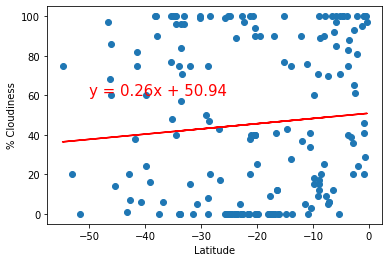

In [61]:
#Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

#Now we'll create the linear regression line and plot for percent cloudiness in the Southern Hemisphere.

#Generate the x-value equal to the latitude column and the y-value equal to the cloudiness column from the southern_hemi_df DataFrame. Call the plot_linear_regression function. Be sure to edit the title, y_label, and text_coordinates for the percent cloudiness scatter plot.

#Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))


In [ ]:
#finding
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. Check the r-values for your plots. 

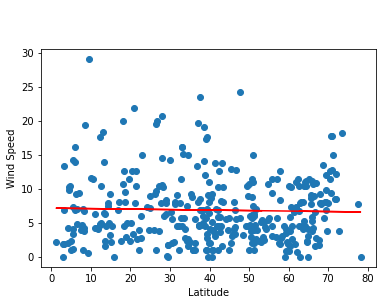

In [73]:
#6.4.5 Find the Correlation Between Latitude and Wind Speed
# One more linear regression line and plot and you'll be done! This time you need to create the linear equation plot on the latitude and wind speed for the Northern and Southern Hemispheres. Remember to stay focused so you don't make any mistakes when you refactor the code.
#By now you're considering how to automate this process. You could write an algorithm to execute the scripts to generate the x- and y-values from the Northern and Southern Hemispheres DataFrames and call the plot_linear_regression function. Your manager and CEO would be impressed!
#Seeing that we're nearly finished, let's stay focused and knock out the last regression lines and equations for the wind speed for the Northern and Southern Hemispheres.
#Perform Linear Regression on the Wind Speed for the Northern Hemisphere
#Call the plot_linear_regression function, with the x-value equal to the Latitude column and the y-value equal to the Wind Speed column from the northern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates for the wind speed scatter plot.
#Add the code to a new cell and run it to generate the linear regression and plot the data.


# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed",(40,35))


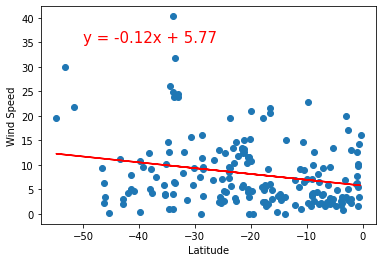

In [72]:
# Perform Linear Regression on the Wind Speed for the Southern Hemisphere

# Finally, let's call the plot_linear_regression function, with the x-value equal to the latitude column and the y-value equal to wind speed column from the southern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates for the wind speed scatter plot.

# Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere \n for Wind Speed", 'Wind Speed',(-50,35))


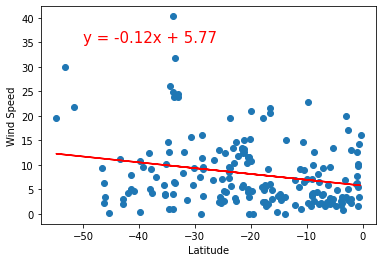

In [76]:
#Perform Linear Regression on the Wind Speed for the Southern Hemisphere

#Finally, let's call the plot_linear_regression function, with the x-value equal to the latitude column and the y-value equal to wind speed column from the southern_hemi_df DataFrame. Edit the title, y_label, and text_coordinates for the wind speed scatter plot.

#Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere for Wind Speed", 'Wind Speed',(-50,35))


In [ ]:
# finding
#  The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. Check the r-values for your plots. 